# Creating Fig. 4.11 for Master thesis

In [38]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os


import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
print(torch.__version__)

1.11.0


In [40]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [41]:
window_len = 30


prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [42]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [43]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf


import os

print(os.getcwd())



/home/ubuntu/results


In [44]:
file = '10000sims_17params_05_04_nsf_threshold'
file = '10000sims_17params_20_04_nsf_threshold_lower_std'

print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/results
/home/ubuntu/results


In [45]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


In [46]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

In [48]:
file = '10000sims_17params_11_04_nsf_supra_ratio'

file = '10000sims_17params_20_04_nsf_supra_lower_std'

file = '10000sims_17params_20_04_nsf_supra_001_std'


thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

In [49]:
samples_supra_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


In [50]:
s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam size  param size17
param size 17 early stopparam size

 200.0early stopparam size 17200.0 param size param size1717   


17
early stop17param size17param size 
  early stop
200.017


 early stopearly stop 200.0 200.0early stop
param size  
param size param size early stop17 
   200.017200.0
17

param size 200.0  
17
17
param size  param size 17 

17
num_paramsnum_paramsnum_params 17 num_params17
 
 1717num_params
num_params
joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs  

17
17joblib will run over 1 jobs


joblib will run over 1 jobsjoblib will run over 1 jobs

num_params [Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
17
num_params 17
joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

 22.03893699]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  1.9min
Building the NEURON model
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 24.45008835 24.36709166
 24.28421796]
param size 17
early stop 200.0
param size  17
Simulation time: 10.0 ms...
num_params 17
joblib will run over 1 jobs[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  2.0min

Building the NEURON model
Simulation time: 20.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 21.81642867 21.74507655
 21.67376701]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  2.0min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 16.38765317 16.32643334
 16.26526051]
param size 17
early stop 200.0
param size  17
num_params 17
jobli

param size  17
Simulation time: 60.0 ms...
num_params 17
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  4.1min
joblib will run over 1 jobs
Simulation time: 10.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...Simulation time: 80.0 ms...

[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms.

Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulatio

Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 22.58789165 22.51377767
 22.43965838]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jo

Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 23.63021041 23.55418486
 23.47823303]
param size 17
early stop 200.0
param size  17
num_param

Simulation time: 150.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  51 tasks      | elapsed: 13.5min
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 22.4756439  22.39852666
 22.32149315]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 13.6min
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 20.01805186 19.95008928
 19.88216662]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 13.6min
Building the NEURON model
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
[Done]obs
 running trial 1 on 1 cores
[-0.59760178 -0

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 25.92855377 25.84053356
 25.75260324]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 15.9min
Simulation time: 90.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 20.96757786 20.89458473
 20.82167859]
par

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed: 18.0min
Building the NEURON model
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms..

Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
obs [-0.59760178 -0.598

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  89 tasks      | elapsed: 22.8min
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 19.57336411 19.50603572
 19.4387239 ]
param size 17
early stop 200.0
param size  17
num_params 17
Simulation time: 140.0 ms...
joblib will run over 1 jobs
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 19.7073101  19.63912174
 19.57105

In [51]:
s_x_t = inference.run_only_sim(samples_t_100, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam size  17param size17
 17
early stopparam sizeearly stop 
early stopparam size 17  param size
200.0 
param size17 param sizeearly stop param size 
200.0200.0  1717 
200.0
early stop
param size early stop1717 
 early stop200.0
17
early stop 


 param size 200.0
param size param size  17
 param size  200.01717  17
200.0


param size  
param size  1717

num_paramsnum_params num_paramsnum_params num_params 17 17
 
1717joblib will run over 1 jobs17



joblib will run over 1 jobs
joblib will run over 1 jobsnum_paramsjoblib will run over 1 jobs 17joblib will run over 1 jobs


num_params[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
 17

joblib will run over 1 jobs
joblib will run over 1 jobsnum_params
 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

obs [-0.59760178 -0.59840714 -0.59920666 ... 25.19919415 25.11305055
 25.02696085]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.9min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.69338268 26.60475223
 26.51617109]
param size 17
early stop 200.0
param size  17
[Done]
running trial 1 on 1 cores
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  2.0min
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.03767799 27.9477145
 27.85776663]
Simulation time: 0.03 ms...
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  2.0min
Build

Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Si

Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulati

Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 

 37.26611188]
param size 17Simulation time: 110.0 ms...
early stop 
200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 11.1min
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 37.84757166 37.72753039
 37.6075775 ]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed: 11.2min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 10.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 m

Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 33.3597466  33.25521755
 33.15073301]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 13.4min
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.61719987 28.51352709
 28.410014  ]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 13.4min
Simulation time: 150.0 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.63579909 29.53929631
 29.44287135]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 

 25.55361039]
param size 17
early stop 200.0
param size  17
[Done]
running trial 1 on 1 cores
num_params 17
joblib will run over 1 jobs
Simulation time: 0.03 ms...
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 15.6min
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.63045542 32.52500955
 32.41960004]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: D

Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simul

Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 170.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 60.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.83997772 32.74579919
 32.65158719]
param size 17
early stop 2

Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
[Done]
Simulation time: 130.0 ms...running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.47513906 28.38669822
 28.29821394]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
Simulation time: 150.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.00362828 25.92381449
 25.84383846]
param size 17
early stop 200.0
param size  17
num_pa

In [52]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [53]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param size param size17 param sizeparam size
early stop 17param size  param size17 
17
 17early stopparam size17


 early stopearly stopearly stop17   
200.0200.0early stop
 
200.0 param size 200.0
param size   
param size 17200.0param size  
17 

17param size 
200.0 17
param size param size 17
17
 17
early stop 
early stop 200.0200.0

param size param size  17 
17
num_paramsnum_paramsnum_paramsnum_paramsnum_params  1717
 17 

 1717
joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs

joblib will run over 1 jobs

num_paramsjoblib will run over 1 jobsnum_params  17
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

17
num_params 17
joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

Building the NEURON model
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 35.29069354 35.1827315
 35.07470092]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.9min
Building the NEURON model
[Done]
running trial 1 on 1 cores
obs [-0.59760178 -0.59840714 -0.59920666 ... 34.69150315 34.57641059
 34.461386  ]
param size 17
early stop 200.0
param size  17
Simulation time: 0.03 ms...
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  2.0min
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 21.97456722 21.90185161
 21.82918285]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  2.0min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 10.0 ms...
[Done]
running trial

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulatio

Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation 

Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 42.29635177 42.16047718
 42.02469607]
param size 17
early stop 200.0
param size  17
num

Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 46.86914483 46.72443113
 46.57960544]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 11.2min
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 20.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 20.15548393 20.09258928
 20.02973062]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed: 11.2min
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 30.0 ms...
Simulation time: 160.0 

Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 60.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
obs [-0.34190293 -0.33879501 -0.33557328 ... 41.8148934  41.69164131
 41.56834921]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 13.5min
obs [-0.57014741 -0.57002297 -0.5698639  ... 39.25301869 39.14937404
 39.04559368]
param size 17
early stop 200.0
param size  17
num_params 17
Building the NEURON model
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 13.6min
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.5

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  62 tasks      | elapsed: 15.6min
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 42.29125857 42.14901859
 42.00683768]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 15.6min
Building the NEURON model
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
obs [-0.30952906 -0.30429189 -0.29888875 ... 36.14653205 36.03618237
 35.92585201]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over

Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 140.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulat

Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 190.0 ms...
obs [ 0.72837011  0.74813349  0.76811872 ... 20.33580433 20.27285288
 20.20989575]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 20.6min
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 160.0 ms..

joblib will run over 1 jobs
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 

In [59]:
s_x_torch_t = torch.stack(([s_x_t[i] for i in range(100)]))
s_x_torch_s = torch.stack(([s_x_s[i] for i in range(100)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(100)]))


mean_s = torch.mean(s_x_torch_s, 0)
std_s = torch.std(s_x_torch_s, 0)

mean_t = torch.mean(s_x_torch_t, 0)
std_t = torch.std(s_x_torch_t, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower_s = mean_s - 1.96 * std_s

upper_s = mean_s + 1.96 * std_s


lower_t = mean_t - 1.96 * std_t

upper_t = mean_t + 1.96 * std_t


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



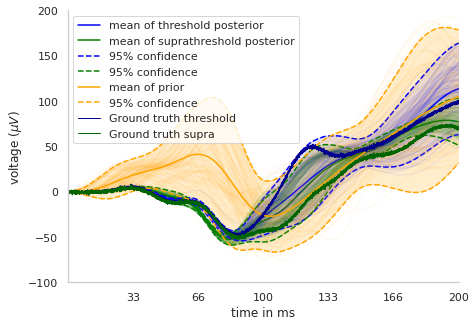

In [60]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1, figsize=(7,5))
#ax.set_title("Comparing signal")

    
plt.plot(mean_t, color ='blue', label='mean of threshold posterior')
plt.plot(mean_s, color ='green', label='mean of suprathreshold posterior')

for s in s_x_t:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)
    
for s in s_x_s:
    plt.plot(s, alpha=0.05, color='green')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)

plt.plot(lower_t, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper_t, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_t, y2=upper_t, color='blue', alpha=0.1)

plt.plot(lower_s, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_s, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_s, y2=upper_s, color='green', alpha=0.1)

#plt.xlim(0, 5100)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
#plt.xlim(0, 6300)



plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, color='darkblue', linewidth=1, linestyle='-', label='Ground truth threshold')
plt.plot(obs_real2, linestyle = '-', label='Ground truth supra', color='darkgreen', linewidth=1)


plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])

plt.xlim(0, 6000)

sns.despine()
plt.legend()